In [20]:
import pandas as pd

#Load CSVs
order_df = pd.read_csv(r"C:\Users\Dell\Downloads\Data_Set\Order.csv")
deal_df = pd.read_csv(r"C:\Users\Dell\Downloads\Data_Set\Deal.csv")
position_df = pd.read_csv(r"C:\Users\Dell\Downloads\Data_Set\Position.csv")





In [21]:
# Quick inspection
print(deal_df.head())
print(deal_df.columns)


                  Time         Deal           Symbol     Type Direction  \
0  2024.12.02 06:42:17  20331065905              NaN  balance       NaN   
1  2024.12.02 08:16:09  20331121120  Boom 1000 Index      buy        in   
2  2024.12.02 08:16:10  20331121125  Boom 1000 Index      buy        in   
3  2024.12.02 08:16:12  20331121171  Boom 1000 Index      buy        in   
4  2024.12.02 08:16:13  20331121182  Boom 1000 Index      buy        in   

   Volume      Price         Order  Commission  Fee  Swap  Profit  Balance  
0     NaN        NaN           NaN           0    0   0.0   31.81    31.81  
1     0.2  20702.076  2.029821e+10           0    0   0.0    0.00    31.81  
2     0.2  20702.066  2.029821e+10           0    0   0.0    0.00    31.81  
3     0.2  20702.022  2.029821e+10           0    0   0.0    0.00    31.81  
4     0.2  20701.994  2.029821e+10           0    0   0.0    0.00    31.81  
Index(['Time', 'Deal', 'Symbol', 'Type', 'Direction', 'Volume', 'Price',
       'Order'

In [22]:
import os

# List all files in the folder
folder_path = r"C:\Users\Dell\Downloads\Data_Set"
print(os.listdir(folder_path))


['Deal.csv', 'Order.csv', 'Position.csv', 'Trading Data Analysis.ipynb']


In [23]:
# Convert time columns
deal_df['Time'] = pd.to_datetime(deal_df['Time'], errors='coerce')
order_df['Time'] = pd.to_datetime(order_df['Time'], errors='coerce')

# Clean Volume in Order table if needed
order_df['Volume'] = order_df['Volume'].astype(str).str.split('/').str[0].astype(float)

# Remove non-trade rows (like 'balance') in Deal
deal_df = deal_df[deal_df['Type'].str.lower() != 'balance']


In [24]:
# Calculate profit/loss statistics
total_trades = len(deal_df)
winning_trades = deal_df[deal_df['Profit'] > 0]
losing_trades = deal_df[deal_df['Profit'] <= 0]

win_rate = len(winning_trades) / total_trades * 100
avg_profit = deal_df['Profit'].mean()
total_profit = deal_df['Profit'].sum()

print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Average P/L per Trade: {avg_profit:.2f}")
print(f"Total P/L: {total_profit:.2f}")


Total Trades: 7360
Win Rate: 15.19%
Average P/L per Trade: -0.51
Total P/L: -3726.51


In [25]:
#Performance by Currency Pair
pair_perf = deal_df.groupby('Symbol')['Profit'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
print(pair_perf)


                          count      sum      mean
Symbol                                            
Boom 300 Index              612    86.00  0.140523
Jump 50 Index                48     1.78  0.037083
Jump 25 Index               124    -1.64 -0.013226
Step Index                  474   -16.10 -0.033966
Volatility 50 (1s) Index     32   -22.66 -0.708125
Volatility 50 Index         308   -29.94 -0.097208
US Tech 100                  80   -38.40 -0.480000
Crash 900 Index              30   -52.05 -1.735000
Volatility 75 Index          90   -59.30 -0.658889
Boom 900 Index              170   -94.51 -0.555941
Boom 500 Index              144  -359.94 -2.499583
Boom 1000 Index             606  -429.60 -0.708911
Crash 1000 Index           1806 -1230.49 -0.681334
Crash 500 Index            2834 -1484.75 -0.523906


In [26]:
# Add time-based features
deal_df['Hour'] = deal_df['Time'].dt.hour
deal_df['DayOfWeek'] = deal_df['Time'].dt.day_name()

# Profit by hour
hourly_perf = deal_df.groupby('Hour')['Profit'].mean()
print(hourly_perf)

# Profit by day of week
daily_perf = deal_df.groupby('DayOfWeek')['Profit'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)
print(daily_perf)


Hour
0     -2.397857
1      3.377374
2      1.482273
3     10.626349
4     -2.045041
5      2.099217
6     -0.625000
7     -1.451558
8     -1.533536
9      1.259453
10    -1.468593
11     0.017475
12    -0.604257
13    -1.702849
14    -0.890339
15     0.251169
16    -0.707953
17    -2.191102
18     0.416178
19    -0.810690
20    -0.704186
21    -1.395069
22    -2.769892
23     2.414402
Name: Profit, dtype: float64
DayOfWeek
Monday      -0.271599
Tuesday     -1.153503
Wednesday   -0.198959
Thursday    -0.212385
Friday      -0.299652
Name: Profit, dtype: float64


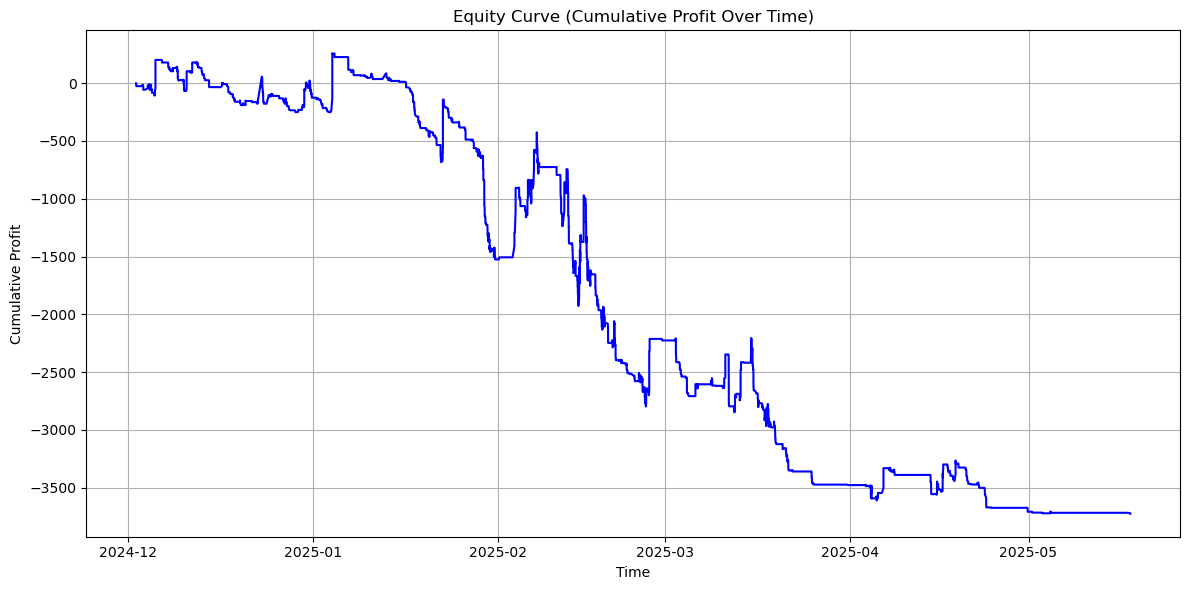

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort by time and calculate cumulative profit
deal_df = deal_df.sort_values('Time')
deal_df['Cumulative_Profit'] = deal_df['Profit'].cumsum()

# Plot equity curve
plt.figure(figsize=(12, 6))
plt.plot(deal_df['Time'], deal_df['Cumulative_Profit'], color='blue')
plt.title('Equity Curve (Cumulative Profit Over Time)')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


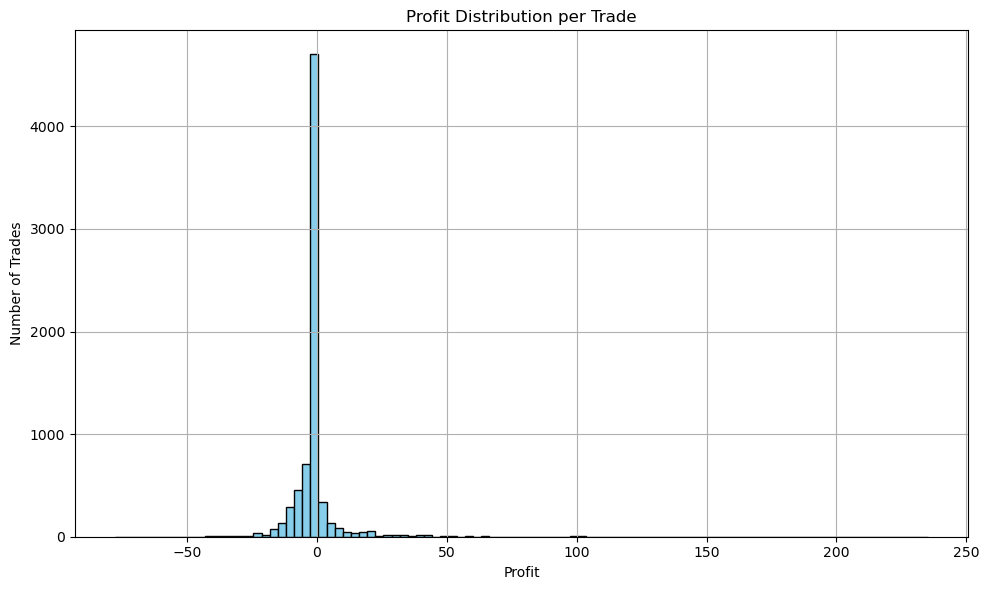

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(deal_df['Profit'], bins=100, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Trade')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.tight_layout()
plt.show()


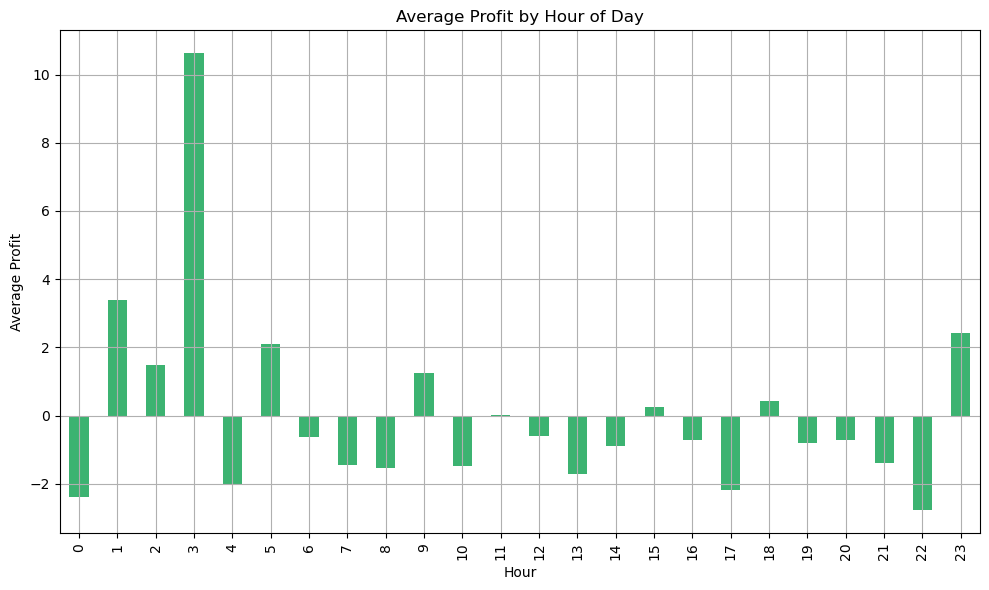

In [29]:
hourly_perf = deal_df.groupby('Hour')['Profit'].mean()

plt.figure(figsize=(10, 6))
hourly_perf.plot(kind='bar', color='mediumseagreen')
plt.title('Average Profit by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


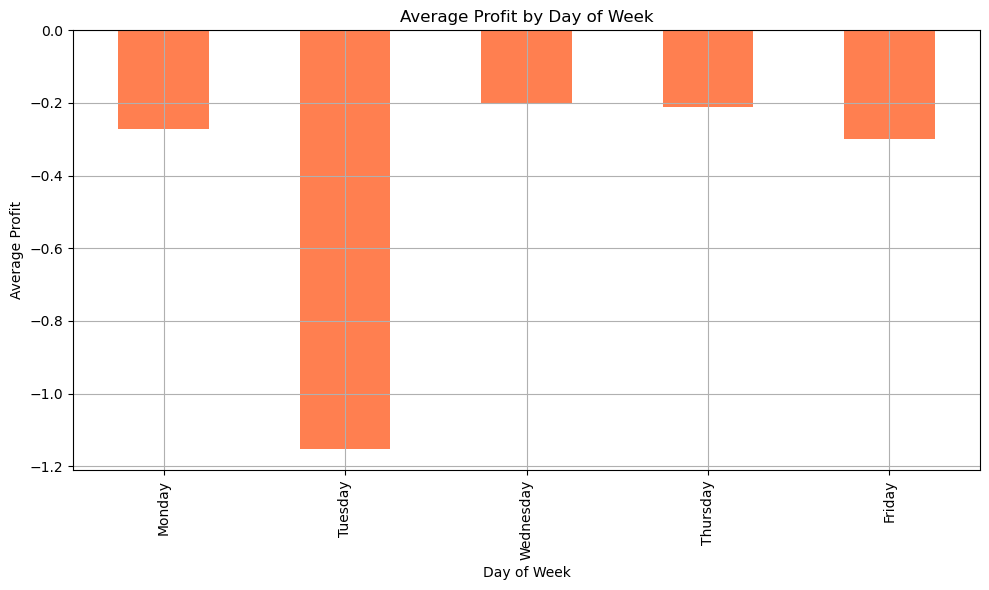

In [30]:
daily_perf = deal_df.groupby('DayOfWeek')['Profit'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

plt.figure(figsize=(10, 6))
daily_perf.plot(kind='bar', color='coral')
plt.title('Average Profit by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


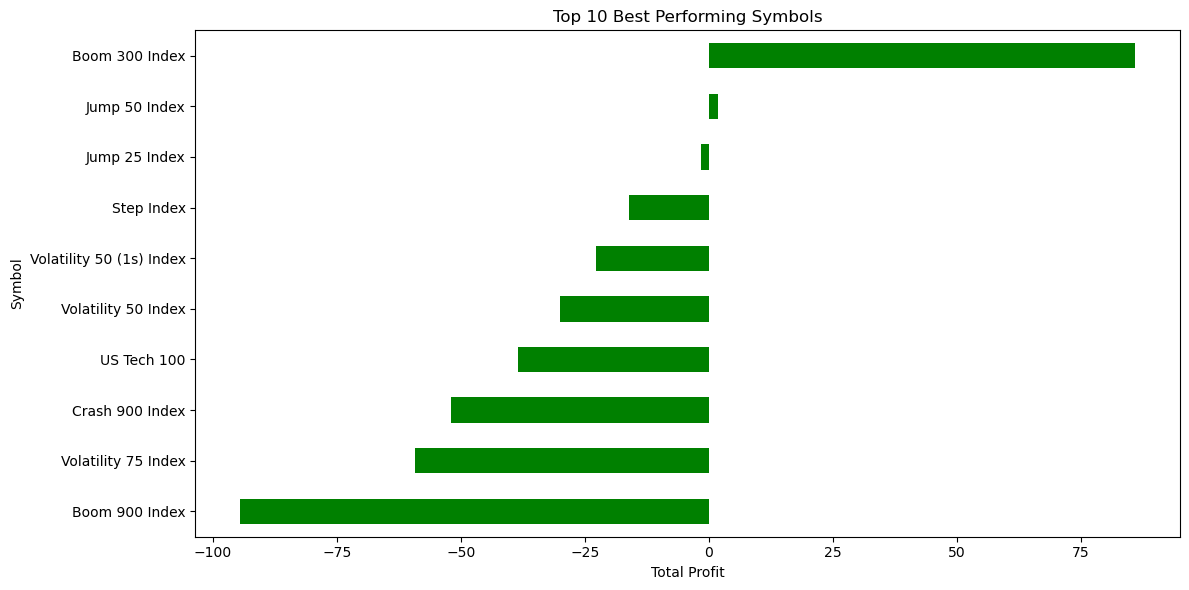

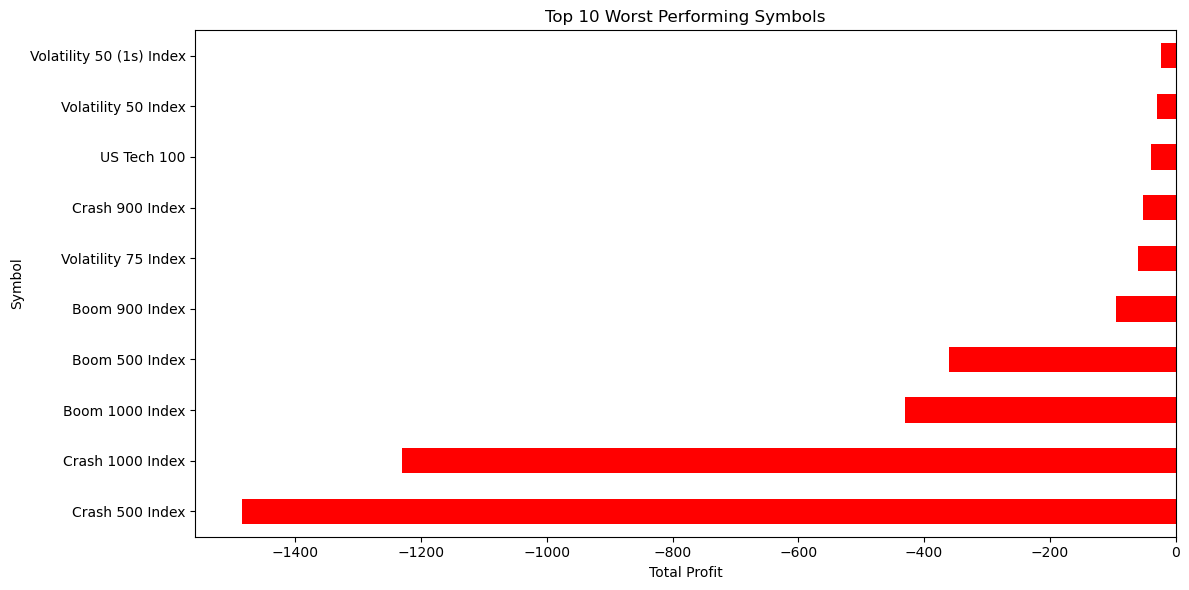

In [31]:
symbol_perf = deal_df.groupby('Symbol')['Profit'].sum().sort_values()

plt.figure(figsize=(12, 6))
symbol_perf.tail(10).plot(kind='barh', color='green')
plt.title('Top 10 Best Performing Symbols')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
symbol_perf.head(10).plot(kind='barh', color='red')
plt.title('Top 10 Worst Performing Symbols')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()


In [32]:
deal_df['Result'] = deal_df['Profit'].apply(lambda x: 'Win' if x > 0 else 'Loss')


In [33]:
symbol_perf = deal_df.groupby(['Symbol', 'Result']).size().unstack().fillna(0)
symbol_perf['WinRate'] = symbol_perf['Win'] / (symbol_perf['Win'] + symbol_perf['Loss']) * 100
print(symbol_perf.sort_values('WinRate', ascending=False))


Result                    Loss  Win    WinRate
Symbol                                        
Volatility 50 Index        231   77  25.000000
Jump 50 Index               37   11  22.916667
Volatility 75 Index         74   16  17.777778
Step Index                 390   84  17.721519
Boom 300 Index             505  107  17.483660
Volatility 50 (1s) Index    27    5  15.625000
Crash 500 Index           2399  435  15.349330
Boom 900 Index             145   25  14.705882
Jump 25 Index              106   18  14.516129
Boom 1000 Index            523   83  13.696370
Crash 1000 Index          1575  231  12.790698
US Tech 100                 70   10  12.500000
Boom 500 Index             131   13   9.027778
Crash 900 Index             29    1   3.333333


In [34]:
hour_perf = deal_df.groupby(['Hour', 'Result']).size().unstack().fillna(0)
hour_perf['WinRate'] = hour_perf['Win'] / (hour_perf['Win'] + hour_perf['Loss']) * 100
print(hour_perf.sort_values('WinRate', ascending=False))


Result  Loss  Win    WinRate
Hour                        
2         27   17  38.636364
3         39   24  38.095238
23       151   58  27.751196
18       396  109  21.584158
1         80   19  19.191919
6        118   28  19.178082
12       412   93  18.415842
20       214   44  17.054264
15       493   97  16.440678
17       387   76  16.414687
19       316   61  16.180371
16       510   91  15.141431
11       426   73  14.629259
21       252   38  13.103448
22       241   36  12.996390
5        145   21  12.650602
13       463   67  12.641509
8        245   35  12.500000
14       364   49  11.864407
9        295   34  10.334347
4        110   11   9.090909
0        115   11   8.730159
10       253   17   6.296296
7        190    9   4.522613


In [35]:
dow_perf = deal_df.groupby(['DayOfWeek', 'Result']).size().unstack().fillna(0)
dow_perf['WinRate'] = dow_perf['Win'] / (dow_perf['Win'] + dow_perf['Loss']) * 100
print(dow_perf.sort_values('WinRate', ascending=False))


Result     Loss  Win    WinRate
DayOfWeek                      
Thursday    956  260  21.381579
Sunday      438   84  16.091954
Monday      754  128  14.512472
Friday     1156  196  14.497041
Tuesday    1250  206  14.148352
Wednesday   934  151  13.917051
Saturday    754   93  10.979929


In [36]:
volume_perf = deal_df.groupby(['Volume', 'Result']).size().unstack().fillna(0)
volume_perf['WinRate'] = volume_perf['Win'] / (volume_perf['Win'] + volume_perf['Loss']) * 100
print(volume_perf.sort_values('WinRate', ascending=False))


Result    Loss    Win     WinRate
Volume                           
0.000      0.0    2.0  100.000000
0.020      4.0    4.0   50.000000
0.400      7.0    3.0   30.000000
4.000    229.0   77.0   25.163399
0.200    488.0  124.0   20.261438
0.500    123.0   31.0   20.129870
0.010    215.0   43.0   16.666667
0.050     15.0    3.0   16.666667
0.100    369.0   67.0   15.366972
1.000   4779.0  763.0   13.767593
0.300      7.0    1.0   12.500000
0.011      4.0    0.0    0.000000
10.000     2.0    0.0    0.000000
